In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [5]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [10]:
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [11]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

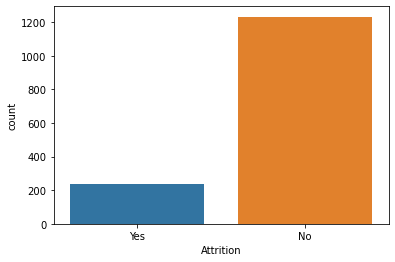

In [12]:
sns.countplot(x="Attrition", data=df)

In [13]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [14]:
df["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [15]:
df["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [3]:
df["StockOptionLevel"].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [4]:
df["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [17]:
df["Over18"]

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object

In [18]:
df.shape

(1470, 35)

In [23]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [19]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [21]:
df["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

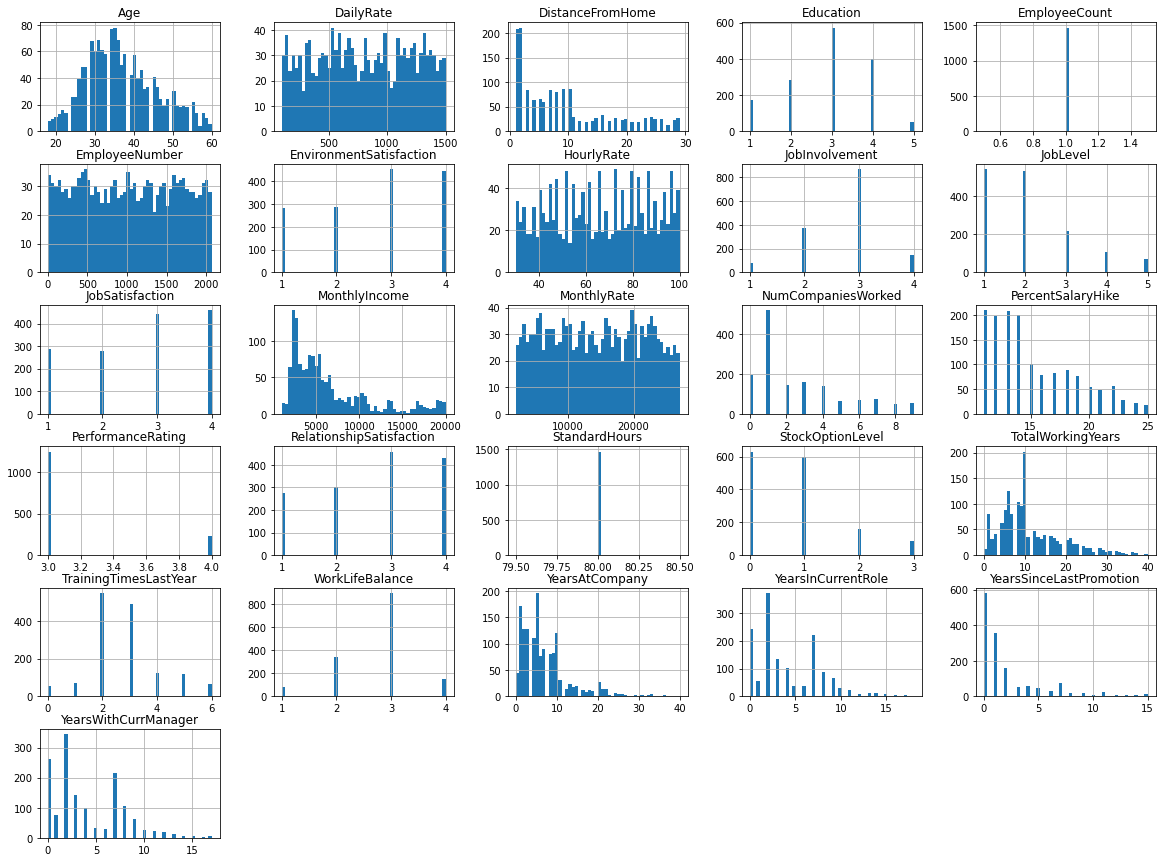

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='Age'>,
        <AxesSubplot:xlabel='Education', ylabel='Age'>,
        <AxesSubplot:xlabel='JobSatisfaction', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='MonthlyIncome'>,
        <AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>,
        <AxesSubplot:xlabel='JobSatisfaction', ylabel='MonthlyIncome'>],
       [<AxesSubplot:xlabel='Age', ylabel='Education'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='Education'>,
        <AxesSubplot:xlabel='Education', ylabel='Education'>,
        <AxesSubplot:xlabel='JobSatisfaction', ylabel='Education'>],
       [<AxesSubplot:xlabel='Age', ylabel='JobSatisfaction'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='JobSatisfaction'>,
        <AxesSubplot:xlabel='Education', ylabel='JobSatisfaction'>,
        <AxesSubplot:xlabel='JobSatisfaction', 

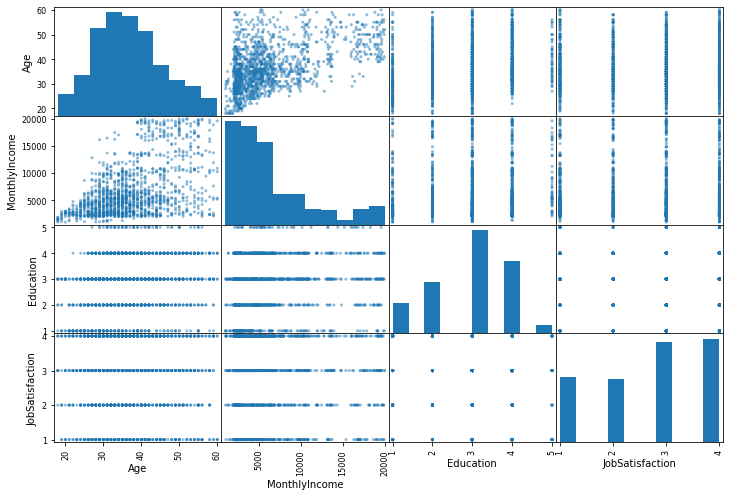

In [26]:
## Using pandas scatter_matrix to plot histograms and scatter
from pandas.plotting import scatter_matrix

attributes = ["Age", "MonthlyIncome", "Education", "JobSatisfaction"]
scatter_matrix(df[attributes], figsize=(12,8))

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='DailyRate', ylabel='Age'>,
        <AxesSubplot:xlabel='DistanceFromHome', ylabel='Age'>,
        <AxesSubplot:xlabel='JobSatisfaction', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='DailyRate'>,
        <AxesSubplot:xlabel='DailyRate', ylabel='DailyRate'>,
        <AxesSubplot:xlabel='DistanceFromHome', ylabel='DailyRate'>,
        <AxesSubplot:xlabel='JobSatisfaction', ylabel='DailyRate'>],
       [<AxesSubplot:xlabel='Age', ylabel='DistanceFromHome'>,
        <AxesSubplot:xlabel='DailyRate', ylabel='DistanceFromHome'>,
        <AxesSubplot:xlabel='DistanceFromHome', ylabel='DistanceFromHome'>,
        <AxesSubplot:xlabel='JobSatisfaction', ylabel='DistanceFromHome'>],
       [<AxesSubplot:xlabel='Age', ylabel='JobSatisfaction'>,
        <AxesSubplot:xlabel='DailyRate', ylabel='JobSatisfaction'>,
        <AxesSubplot:xlabel='DistanceFromHome', ylabel='JobSatisfaction'>,
        <AxesSubplot:xl

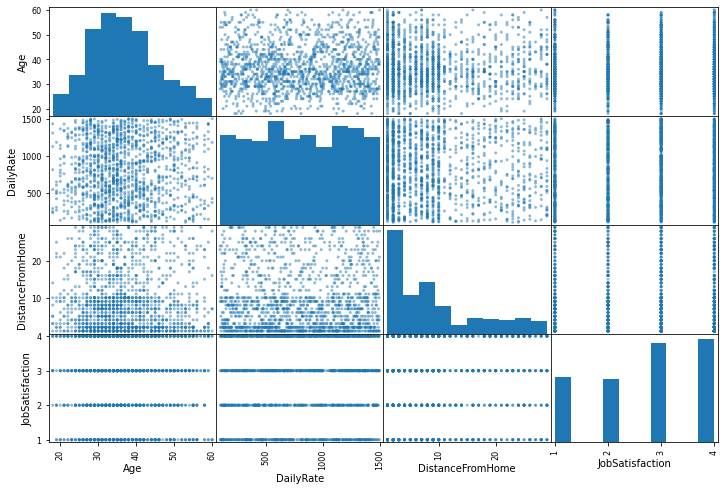

In [27]:
attributes = ["Age", "DailyRate", "DistanceFromHome", "JobSatisfaction"]
scatter_matrix(df[attributes], figsize=(12,8))

In [5]:
##Calculation of the standard correlation coefficient
corr_matrix = df.corr()

In [6]:
corr_matrix

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

<AxesSubplot:>

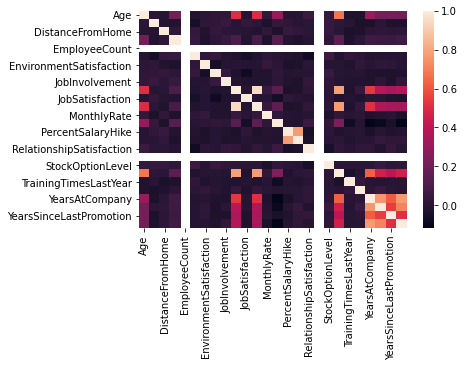

In [7]:
sns.heatmap(corr_matrix)

This figure depicting the heatmap of the correlation values is helping us to understang more these employees attrition data. We can see for example that the job involvment is correlated to the age, total working years, years at company, years in current role, years since last promotion and years with current manager. We can also observe that the last four numerical features (YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager) are highly correlated between each other.

In [30]:
## Let's look at how much each attribute correlated with attrition
corr_matrix["Age"].sort_values(ascending=False)

Age                         1.000000
TotalWorkingYears           0.680381
JobLevel                    0.509604
MonthlyIncome               0.497855
YearsAtCompany              0.311309
NumCompaniesWorked          0.299635
YearsSinceLastPromotion     0.216513
YearsInCurrentRole          0.212901
Education                   0.208034
YearsWithCurrManager        0.202089
RelationshipSatisfaction    0.053535
StockOptionLevel            0.037510
JobInvolvement              0.029820
MonthlyRate                 0.028051
HourlyRate                  0.024287
DailyRate                   0.010661
EnvironmentSatisfaction     0.010146
PercentSalaryHike           0.003634
PerformanceRating           0.001904
DistanceFromHome           -0.001686
JobSatisfaction            -0.004892
EmployeeNumber             -0.010145
TrainingTimesLastYear      -0.019621
WorkLifeBalance            -0.021490
EmployeeCount                    NaN
StandardHours                    NaN
Name: Age, dtype: float64

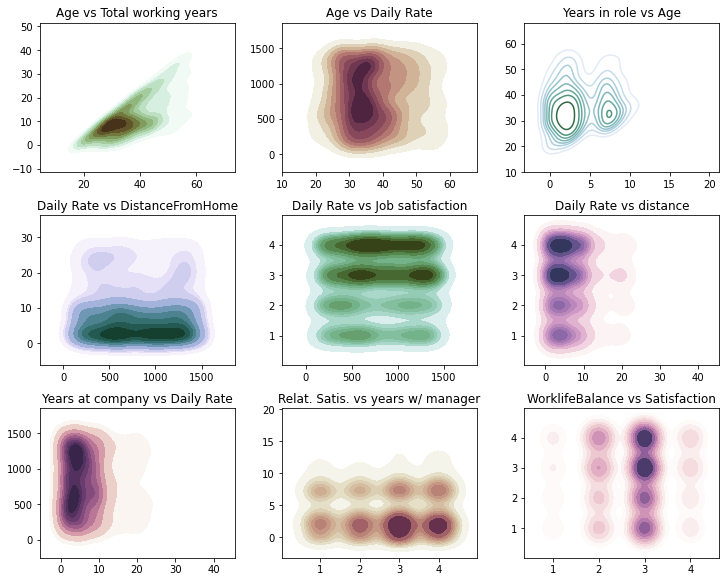

In [43]:
### Now it is time to explore the data 
f, axes = plt.subplots(3,3, figsize=(10,8), sharex = False, sharey = False)

# Definig our colormap scheme 
s = np.linspace(0, 3, 10)

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot 
x = df['Age'].values
y = df['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap = cmap, shade=True, cut = 5, ax = axes[0,0])
axes[0,0].set(title = "Age vs Total working years")


cmap = sns.cubehelix_palette(start = 3.333333333333, light=1, as_cmap=True)
# Generate and plot 
x = df['Age'].values 
y = df['DailyRate'].values 
sns.kdeplot(x,y, cmap = cmap, shade=True, ax = axes[0,1])
axes[0,1].set(title = 'Age vs Daily Rate')


cmap = sns.cubehelix_palette(start = 1.666666667, light = 1, as_cmap = True)
# Generate and Plot 
x = df['YearsInCurrentRole'].values
y = df['Age'].values
sns.kdeplot(x, y, cmap= cmap, ax=axes[0,2])
axes[0,2].set(title='Years in role vs Age')


cmap = sns.cubehelix_palette(start = 2.0, light= 1, as_cmap = True)
# Generate and plot 
x = df['DailyRate'].values
y = df['DistanceFromHome'].values
sns.kdeplot(x, y, cmap= cmap, shade= True, ax = axes[1,0])
axes[1,0].set(title = 'Daily Rate vs DistanceFromHome')


cmap = sns.cubehelix_palette(start=4.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate vs Job satisfaction')


cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate vs distance')


cmap = sns.cubehelix_palette(start=3.0, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company vs Daily Rate')


cmap = sns.cubehelix_palette(start=3.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['RelationshipSatisfaction'].values
y = df['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relat. Satis. vs years w/ manager')


cmap = sns.cubehelix_palette(start=2.8, light=1, as_cmap=True)
# Generate and plot
x = df['WorkLifeBalance'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance vs Satisfaction')

f.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.0)

This figure can help us getting more insightful information about the data. We can observe for example most employees ages are between [25, 40] anf the average of working experience may be situated between [5,12].

In [4]:
df_features = df.drop(["Attrition"], axis=1)
df_features

Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  ... RelationshipSatisfaction  \
0                  1                        2  ...                        1   
1                  2                        3  ...                        4   
2                  4                        4  ...                        2   
3                  5                        4  ...                        3   
4                  7                        1  ...                        4   
...              ...                      ...  ...                      ...   
1465            2061                        3  ...                        3   
1466            2062                        4  ...                        1   
1467            2064                        2  ...                        2   
1468            2065                        4  ...                        4   
1469            2068                        2  ...                        1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
0                80                 0                  8   
1                80                 1                 10   
2                80                 0                  7   
3                80                 0                  8   
4                80                 1                  6   
...             ...               ...                ...   
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

     TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                        0                1              6   
1                        3                3             10   
2                        3                3              0   
3                        3                3              8   
4                        3                3              2   
...                    ...              ...            ...   
1465                     3                3              5   
1466                     5                3              7   
1467                     0                3              6   
1468                     3                2              9   
1469                     3                4 

In [5]:
df_target = df["Attrition"]
df_target

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [6]:
## So here we are transforming this target data: "Yes" = 0, "No"=1
df_target = df_target.apply(lambda x: 0 if x== "Yes" else 1)
df_target

0       0
1       1
2       0
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Attrition, Length: 1470, dtype: int64

**Dividing the data into training and testing data**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.25, random_state=2)

In [9]:
cat_names = []
num_names = []

for col in df_features.columns:
    if df_features[col].dtype == "O":
        cat_names.append(col)
    else:
        num_names.append(col)

In [10]:
cat_names

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [11]:
num_names

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

**Pipeline to automate data transformation**

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

In [13]:
class AttributesSelection(BaseEstimator, TransformerMixin):
    def __init__(self, num_attributes_selected):
        self.num_attributes_selected = num_attributes_selected
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_selected = X[self.num_attributes_selected]
        return X_selected

Building a **full pipeline** using `FeatureUnion()`

In [14]:
num_pipeline = Pipeline([
    ("select_num", AttributesSelection(num_names)),
    
])

In [15]:
cat_pipeline = Pipeline([
    ("select_cat", AttributesSelection(cat_names)),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [16]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [17]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [66]:
X_train

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1092   45  Travel_Rarely        950  Research & Development                28   
80     30  Travel_Rarely        852  Research & Development                 1   
37     35  Travel_Rarely        890                   Sales                 2   
1380   35  Travel_Rarely        682                   Sales                18   
1258   29  Travel_Rarely        590  Research & Development                 4   
...   ...            ...        ...                     ...               ...   
466    41  Travel_Rarely       1276                   Sales                 2   
299    51  Travel_Rarely       1302  Research & Development                 2   
493    44  Travel_Rarely       1112         Human Resources                 1   
527    32  Travel_Rarely        929                   Sales                10   
1192   49  Travel_Rarely        464  Research & Development                16   

      Education    EducationField  EmployeeCount  EmployeeNumber  \
1092          3  Technical Degree              1            1546   
80            1     Life Sciences              1             104   
37            3         Marketing              1              49   
1380          4           Medical              1            1945   
1258          3  Technical Degree              1            1762   
...         ...               ...            ...             ...   
466           5     Life Sciences              1             625   
299           3           Medical              1             408   
493           4     Life Sciences              1             665   
527           3         Marketing              1             722   
1192          3           Medical              1            1674   

      EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
1092                        4  ...                        4             80   
80                          4  ...                        3             80   
37                          4  ...                        1             80   
1380                        2  ...                        4             80   
1258                        4  ...                        3             80   
...                       ...  ...                      ...            ...   
466                         2  ...                        2             80   
299                         4  ...                        4             80   
493                         1  ...                        2             80   
527                         4  ...                        4             80   
1192                        4  ...                        2             80   

      StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
1092                 1                  8                     3   
80                   2                 10                     1   
37                   0                  2                     3   
1380                 1                  6                     2   
1258                 1                  1                     2   
...                ...                ...                   ...   
466                  1                 22                     2   
299                  1                 13                     3   
493                  0                 10                     1   
527                  0                 10                     2   
1192                 1                 17                     2   

      WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
1092                3              5                   4   
80                  2             10                   8   
37                  3              2                   2   
1380                1              5                   3   
1258                3              1                   0   
...               ...            ...                 ...   
466                 3             18                  

In [41]:
import sklearn

In [62]:
len(X_train.columns)

34

In [67]:
cat_names

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [68]:
len(num_names)

26

In [63]:
len(full_pipeline.transformer_list[1][1][1].get_feature_names())

29

In [70]:
columns_name = full_pipeline.transformer_list[1][1][1].get_feature_names()
columns_name

array(['x0_Non-Travel', 'x0_Travel_Frequently', 'x0_Travel_Rarely',
       'x1_Human Resources', 'x1_Research & Development', 'x1_Sales',
       'x2_Human Resources', 'x2_Life Sciences', 'x2_Marketing',
       'x2_Medical', 'x2_Other', 'x2_Technical Degree', 'x3_Female',
       'x3_Male', 'x4_Healthcare Representative', 'x4_Human Resources',
       'x4_Laboratory Technician', 'x4_Manager',
       'x4_Manufacturing Director', 'x4_Research Director',
       'x4_Research Scientist', 'x4_Sales Executive',
       'x4_Sales Representative', 'x5_Divorced', 'x5_Married',
       'x5_Single', 'x6_Y', 'x7_No', 'x7_Yes'], dtype=object)

In [69]:
26+29

55

In [18]:
X_train_prepared.shape

(1102, 55)

In [19]:
X_train_prepared

array([[4.500e+01, 9.500e+02, 2.800e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+01, 8.520e+02, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [3.500e+01, 8.900e+02, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [4.400e+01, 1.112e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [3.200e+01, 9.290e+02, 1.000e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [4.900e+01, 4.640e+02, 1.600e+01, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

Handling the **Imbalanced Data**

In [20]:
y_train.value_counts()

1    927
0    175
Name: Attrition, dtype: int64

In [1]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
os = RandomOverSampler()

In [26]:
X_train_sampled, y_train_sampled = os.fit_resample(X_train_prepared, y_train)

In [27]:
y_train_sampled.shape

(1854,)

<AxesSubplot:>

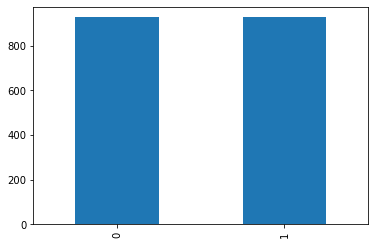

In [28]:
y_train_sampled.value_counts().plot(kind="bar")

In [29]:
X_train_sampled.shape

(1854, 55)

**Applying `RandomizedSearch()` to find the best hyperparameters**

In [30]:
rf = RandomForestClassifier()

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
## RandomGrid Search: tuning the hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30, 60]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_sampled, y_train_sampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              60],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [34]:
## printing the best model parameters
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [35]:
## The best estimator 
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200)

**Plotting graphs to discover features importance**

In [71]:
rf_clf_best.feature_importances_

array([0.05301473, 0.04679365, 0.04025442, 0.01631946, 0.        ,
       0.0447321 , 0.03220057, 0.04288927, 0.01737717, 0.02143415,
       0.03001926, 0.05832328, 0.04029464, 0.02506404, 0.0281805 ,
       0.00391616, 0.02235014, 0.        , 0.04294202, 0.04476824,
       0.02065461, 0.01794828, 0.03820226, 0.03047558, 0.02230797,
       0.03014234, 0.0046266 , 0.01184413, 0.00740324, 0.00138784,
       0.00851012, 0.00906924, 0.00094297, 0.00600807, 0.00475733,
       0.00676307, 0.00237395, 0.00548362, 0.00655883, 0.0068138 ,
       0.00472849, 0.00234362, 0.00637187, 0.00193996, 0.00404662,
       0.00424854, 0.00782543, 0.00719469, 0.00319176, 0.00799143,
       0.00752981, 0.01874498, 0.        , 0.0363537 , 0.03434143])

<AxesSubplot:ylabel='feature'>

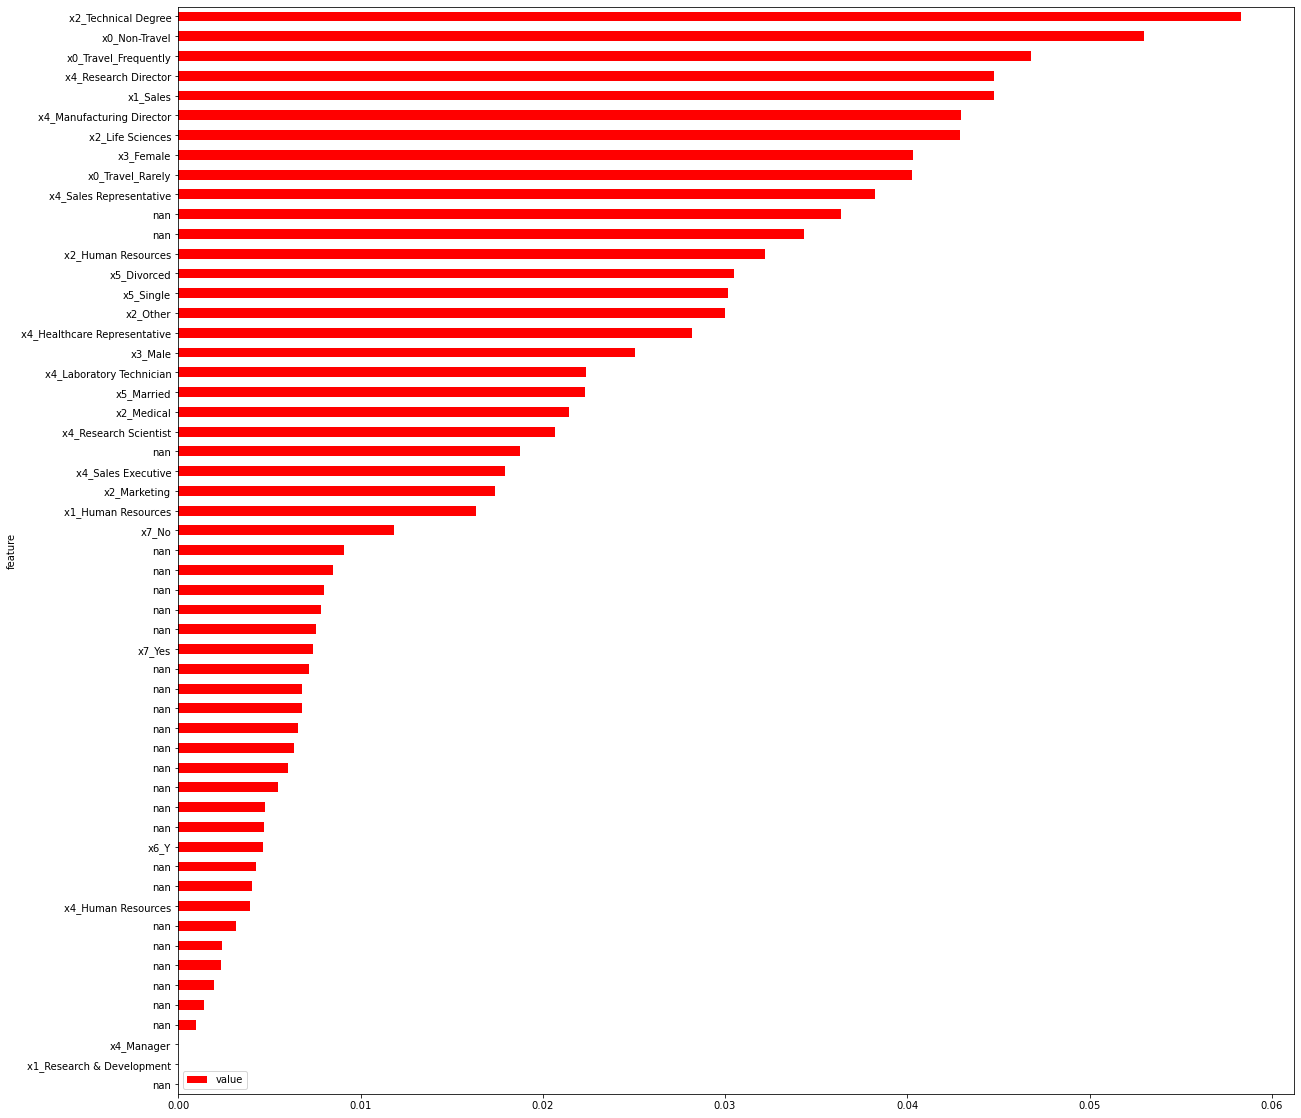

In [76]:
## To know the most important features among the selected ones 
## And plotting the features 
feat_importances = rf_random.best_estimator_.feature_importances_

df_featuresName = pd.DataFrame(data=[feat_importances, columns_name])

df_featuresName = df_featuresName.T

df_featuresName.columns = ["value", "feature"]

df_featuresName = df_featuresName.sort_values(["value"], ascending=True)

## Plotting 
df_featuresName.plot.barh(x = "feature", y="value", color="red", figsize=(20,20), )

In [36]:
rf_clf_best = rf_random.best_estimator_
rf_clf_best

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200)

In [74]:
import plotly.offline as po
import plotly.graph_objs as go
import plotly.tools as tls 
from plotly.offline import plot, iplot

In [73]:
#### analyzing feature importance which tells us which features in our dataset 
# have received the most importance by the Random Forest algorithm
trace = go.Scatter(
    y = rf_clf_best.feature_importances_,
    x = columns_name,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf_clf_best.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = columns_name
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
#plot(fig,filename='featuresImportance_rf.html')

'featuresImportance_rf.html'

In [75]:
## Please run tun this command to observe the figure
iplot(fig)

# Application on test data

In [77]:
X_test_prepared = full_pipeline.fit_transform(X_test)

In [78]:
y_pred = rf_clf_best.predict(X_test_prepared)

<AxesSubplot:>

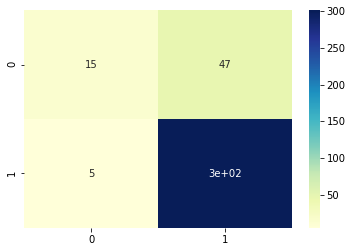

In [79]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [80]:
accuracy_score(y_test, y_pred)

0.8586956521739131

In [82]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.24      0.37        62
           1       0.86      0.98      0.92       306

    accuracy                           0.86       368
   macro avg       0.81      0.61      0.64       368
weighted avg       0.85      0.86      0.83       368

